Assignment# 2 – Fuzzy Expert Systems

I have chosen three independent variables:
    
    1) Sleep 
    2) Exercise
    3) diet
    
The grade of a student depends on these three variables

# Import libraries

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# Generate universe variables

In [2]:
sleep = ctrl.Antecedent(np.arange(0, 11, 1), 'sleep')
exercise = ctrl.Antecedent(np.arange(0, 11, 1), 'exercise')
diet = ctrl.Antecedent(np.arange(0, 11, 1), 'diet')
grade = ctrl.Consequent(np.arange(0, 26, 1), 'grade')

# Generate fuzzy membership functions for input variables

In [3]:
sleep.automf(3)
exercise.automf(3)
diet.automf(3)

# Generate fuzzy membership functions for output variables

In [4]:
grade['low'] = fuzz.trimf(grade.universe, [0, 0, 13])
grade['medium'] = fuzz.trimf(grade.universe, [0, 13, 25])
grade['high'] = fuzz.trimf(grade.universe, [13, 25, 25])

# Visualize these universes and membership functions

C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


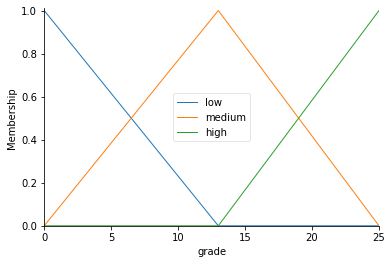

In [5]:
grade.view()

C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


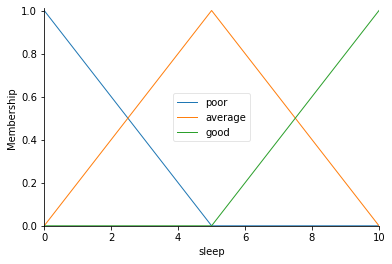

In [6]:
sleep.view()

C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


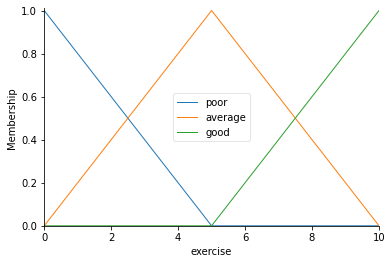

In [7]:
exercise.view()

C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


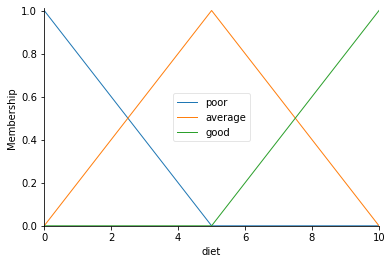

In [8]:
diet.view()

C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


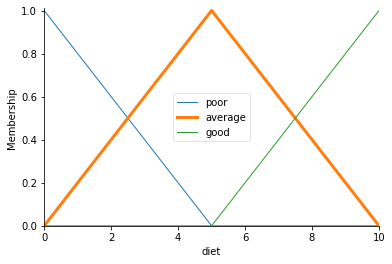

In [9]:
diet['average'].view()

C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


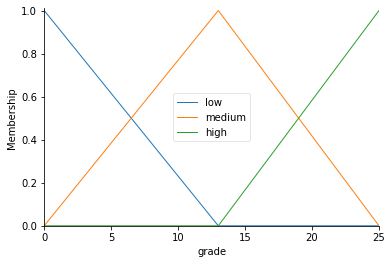

In [10]:
grade.view()

# Rule Evaluation (Inference)
1. If the sleep is poor OR the exercise is poor OR the diet is poor, then the grade will be low
2. If the sleep is good OR the exercise is good OR the diet is good, then the grade will be high
3. If the sleep is average OR the exercise is average OR the diet is average, then the grade will be low

In [11]:
rule1 = ctrl.Rule(sleep['poor'] | exercise['poor'] | diet['poor'] , grade['low'])
rule2 = ctrl.Rule(sleep['good'] | exercise['good'] | diet['good'], grade['high'])
rule3 = ctrl.Rule(sleep['average'] | exercise['average'] | diet['average'], grade['medium'])

# Next we add these rules to a new ControlSystem and define a ControlSystemSimulation to run it.

In [12]:
grading_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [13]:
grading = ctrl.ControlSystemSimulation(grading_ctrl)

# Defuzzication and evaluation of variables

In [14]:
grading.input['sleep'] = 6
grading.input['exercise'] = 5
grading.input['diet'] = 4
grading.compute()

In [15]:
print(grading.output['grade'])

12.644017725258493


C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


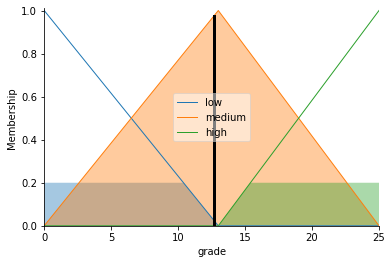

In [16]:
grade.view(sim=grading)

In this diagram, diet, exercise and sleep are all in the average range. So, according to the rules, grade is also in the same range that is medium.

In [17]:
grading.input['sleep'] = 1
grading.input['exercise'] = 2
grading.input['diet'] = 1
grading.compute()

In [18]:
print(grading.output['grade'])

9.746533923303831


C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


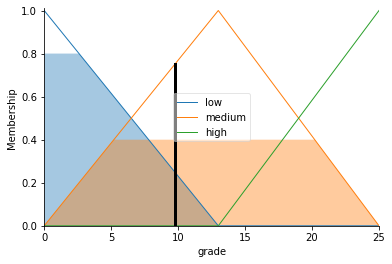

In [19]:
grade.view(sim=grading)

In this diagram, diet, exercise and sleep are all in the poor range. So, according to the rules, grade is also in the same range that is low.

In [20]:
grading.input['sleep'] = 10
grading.input['exercise'] = 11
grading.input['diet'] = 9
grading.compute()

In [21]:
print(grading.output['grade'])

17.012960807140086


C:\Users\Shrita\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


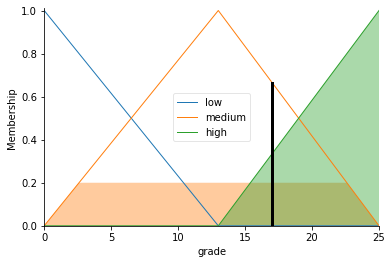

In [22]:
grade.view(sim=grading)

In this diagram, diet, exercise and sleep are all in the good range. So, according to the rules, grade is also in the same range that is high.